#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [322]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
#load dataset

df = pd.read_csv('heart.csv')

In [324]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [325]:
#descreptive summary

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [327]:
#checking for duplicate values
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [328]:
#remove duplicate values
df.drop_duplicates(inplace=True)

In [329]:
df.shape

(302, 14)

In [330]:
#lets check unique values for age
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [331]:
df['sex'].unique()

array([1, 0])

In [332]:
df['cp'].unique()

array([3, 2, 1, 0])

<Axes: >

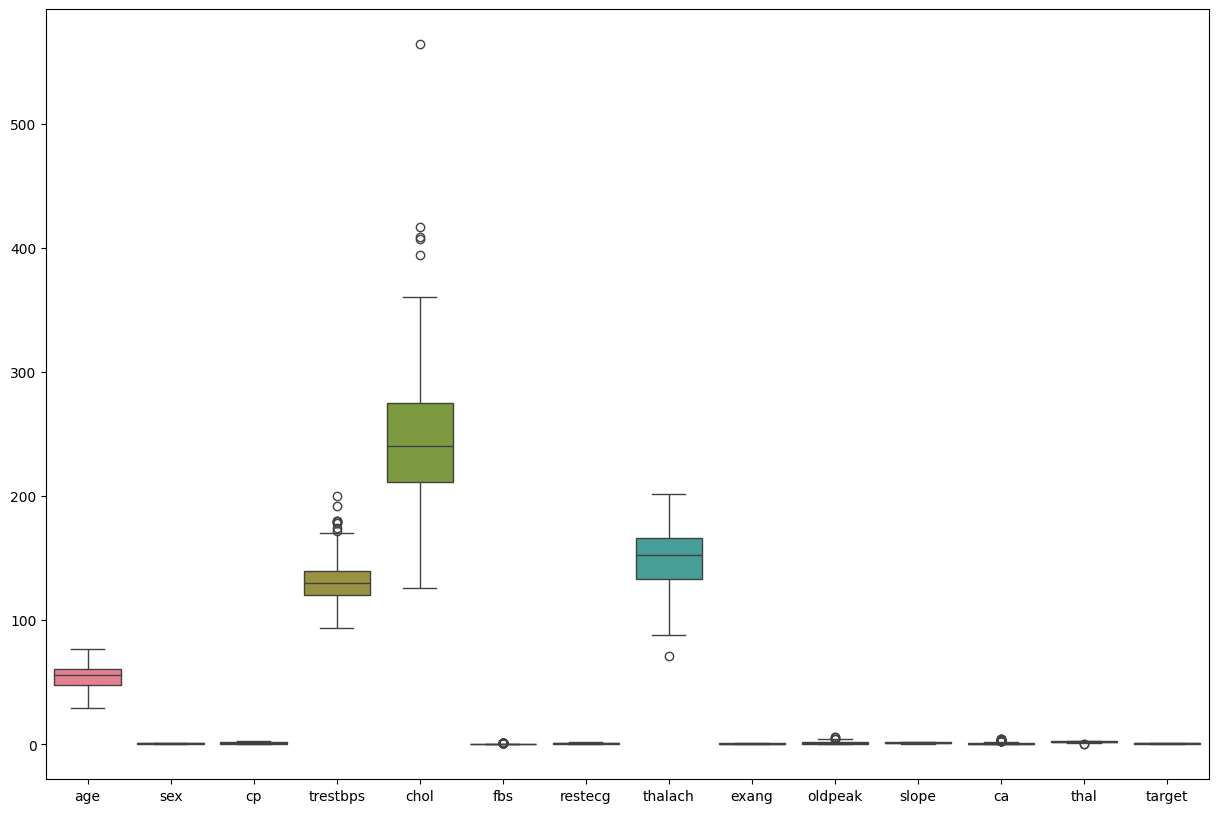

In [333]:
#lets check for outliers usinf boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [334]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<Axes: xlabel='trestbps', ylabel='Count'>

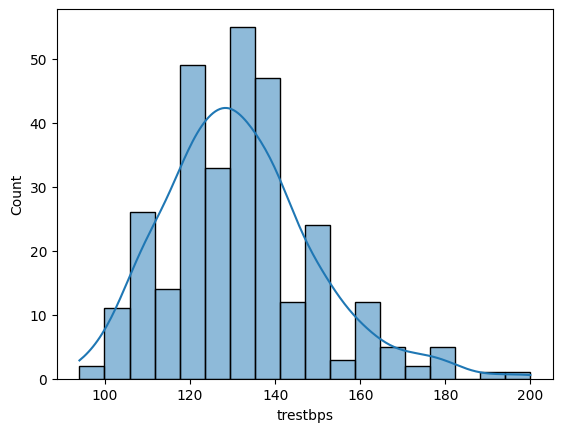

In [335]:
#lets check distribution with kde for trestbps

sns.histplot(df['trestbps'],kde=True)

In [336]:
#lets remove the outliers of trestbps by median imputation

Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['trestbps'] < lower_bound, 'trestbps'] = df['trestbps'].median()
df.loc[df['trestbps'] > upper_bound, 'trestbps'] = df['trestbps'].median()

<Axes: xlabel='trestbps', ylabel='Count'>

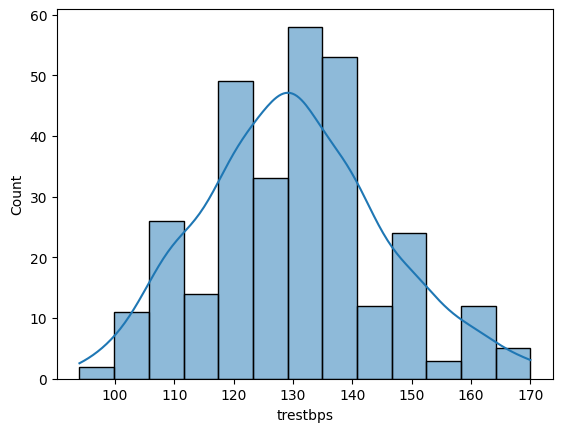

In [337]:
#checking distribution through visualization
sns.histplot(df['trestbps'],kde=True)

In [338]:
#removing outliers for feature chol
df['chol'].astype(float)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['chol'] < lower_bound, 'chol'] = df['chol'].median()
df.loc[df['chol'] > upper_bound, 'chol'] = df['chol'].median()

<ipython-input-338-c9b156994daf>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '240.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['chol'] < lower_bound, 'chol'] = df['chol'].median()


<Axes: xlabel='chol', ylabel='Count'>

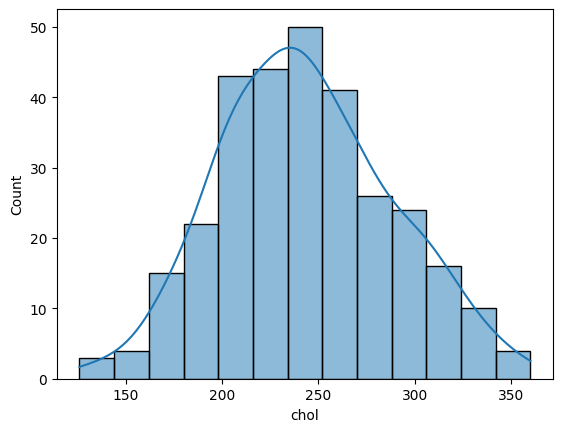

In [339]:
sns.histplot(df['chol'],kde=True)

<Axes: xlabel='fbs', ylabel='Count'>

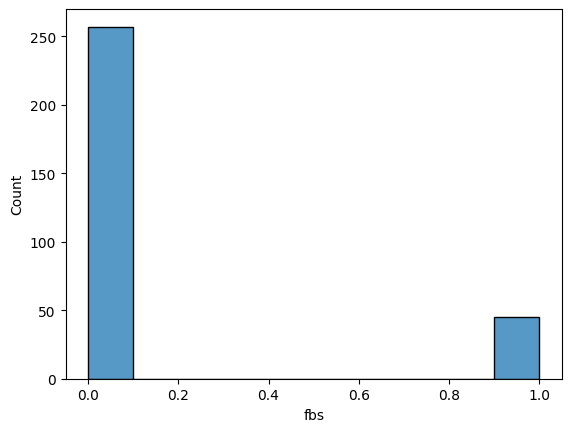

In [340]:
sns.histplot(df['fbs'])

In [341]:

#lets check for values in column fbs i need all array no unique
pd.value_counts(df['fbs'])




<ipython-input-341-3c36935e9ab1>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['fbs'])


,count
fbs,
0,257
1,45


<Axes: xlabel='fbs', ylabel='Count'>

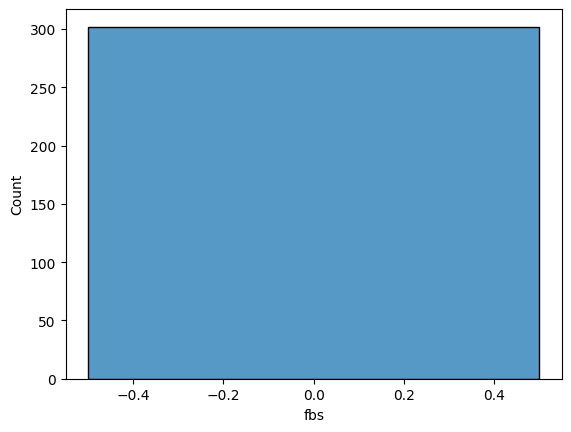

In [342]:
#mode imputation
df['fbs'] = df['fbs'].replace(1, 0)
sns.histplot(df['fbs'])



<Axes: ylabel='fbs'>

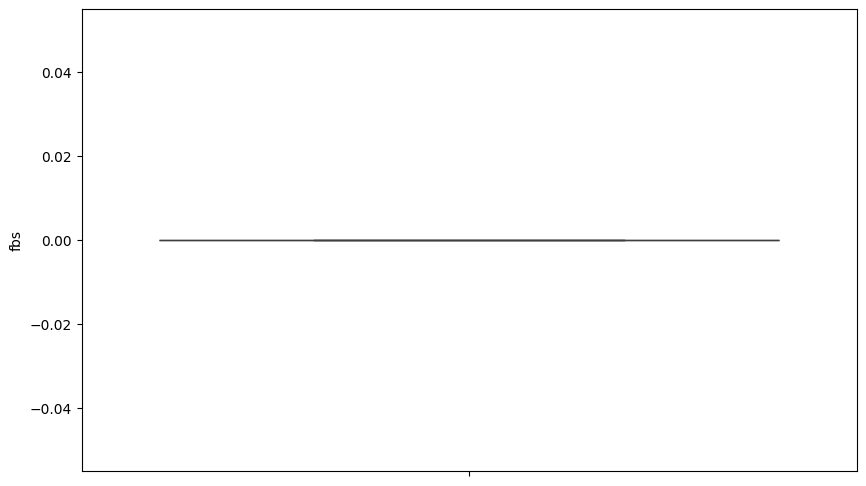

In [343]:
#boxplot for fbs feature
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df['fbs'])

In [344]:
df['restecg'].unique()

array([0, 1, 2])

<Axes: ylabel='restecg'>

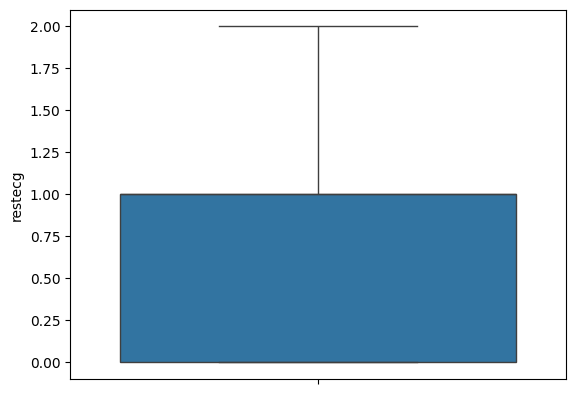

In [345]:

sns.boxplot(df['restecg'])

<Axes: xlabel='thalach', ylabel='Count'>

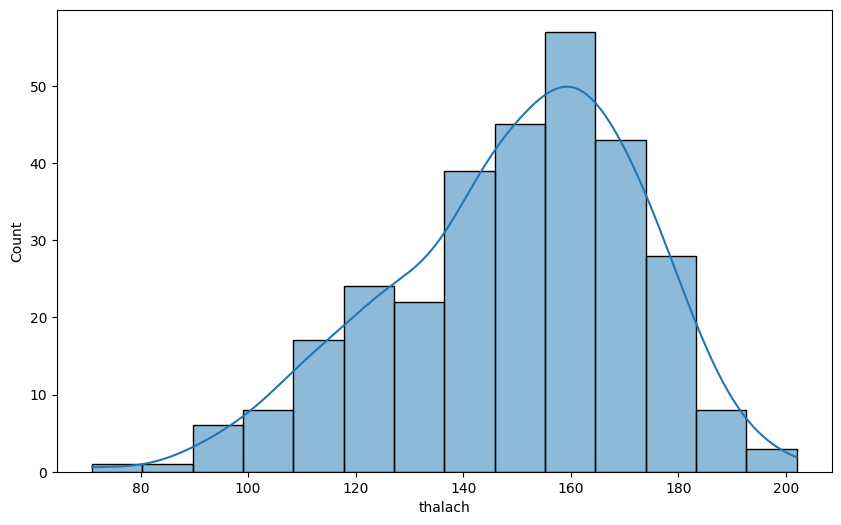

In [346]:
#distribution of thalach using histogram

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['thalach'],kde=True)




<ipython-input-347-142b13292628>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '152.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['thalach'] < lower_bound, 'thalach'] = df['thalach'].median()


<Axes: xlabel='thalach', ylabel='Count'>

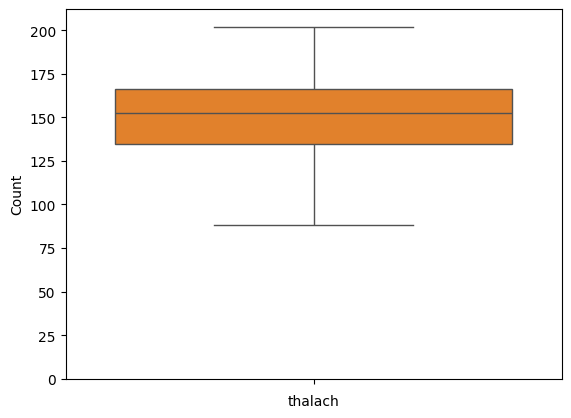

In [347]:

#lets remove outliers by median imputation for thalach
Q1 = df['thalach'].quantile(0.25)
Q3 = df['thalach'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['thalach'] < lower_bound, 'thalach'] = df['thalach'].median()
df.loc[df['thalach'] > upper_bound, 'thalach'] = df['thalach'].median()

#checking distribution through visualization
sns.histplot(df['thalach'],kde=True)
sns.boxplot(df['thalach'])

<Axes: xlabel='oldpeak', ylabel='Count'>

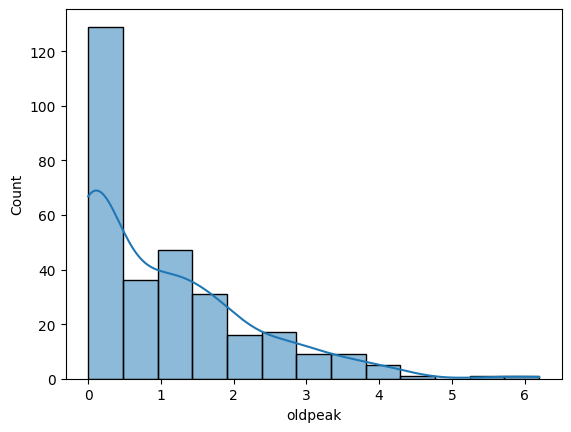

In [348]:
#check all values in list of oldpeak
df['oldpeak'].unique()

#distribution of feature oldpeak
sns.histplot(df['oldpeak'],kde=True)

<ipython-input-349-3f3503837f63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['oldpeak'],palette='rainbow')


<Axes: ylabel='oldpeak'>

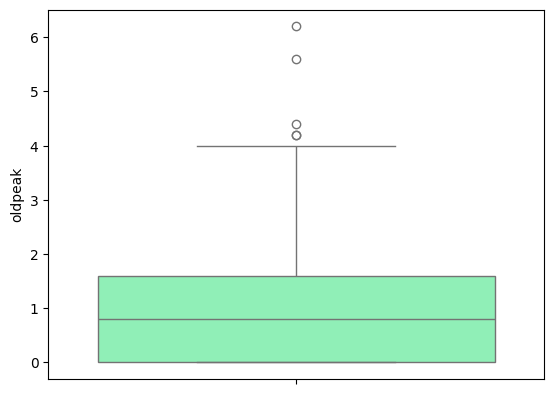

In [349]:
#boxplot for oldpeak
sns.boxplot(df['oldpeak'],palette='rainbow')

<ipython-input-350-06e12fb9c615>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['oldpeak'],palette='rainbow')


<Axes: ylabel='oldpeak'>

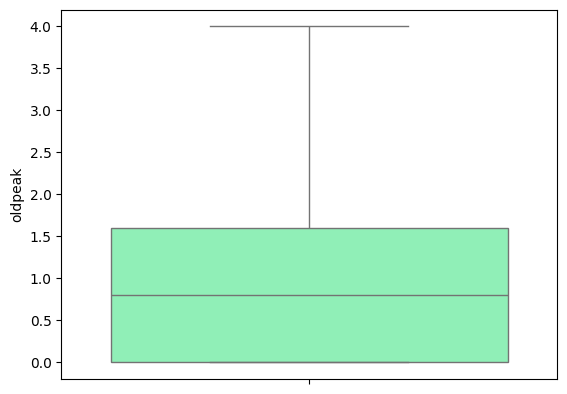

In [350]:
#handling outliers for feature oldpeak
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['oldpeak'] < lower_bound, 'oldpeak'] = df['oldpeak'].median()
df.loc[df['oldpeak'] > upper_bound, 'oldpeak'] = df['oldpeak'].median()

#boxplot for oldpeak
sns.boxplot(df['oldpeak'],palette='rainbow')

<Axes: ylabel='ca'>

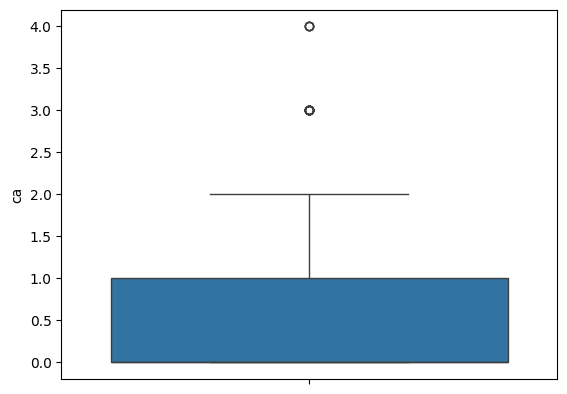

In [351]:
#boxplot for feature ca and thal
sns.boxplot(df['ca'])


<Axes: xlabel='ca', ylabel='Count'>

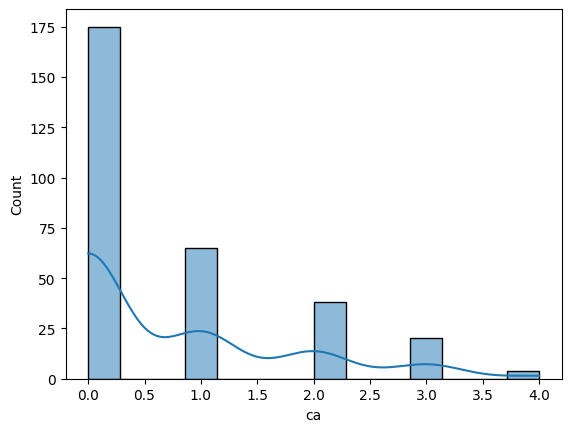

In [352]:
#histplot for ca
sns.histplot(df['ca'],kde=True)


In [353]:
pd.value_counts(df['ca'])

<ipython-input-353-6aedf625f630>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['ca'])


,count
ca,
0,175
1,65
2,38
3,20
4,4


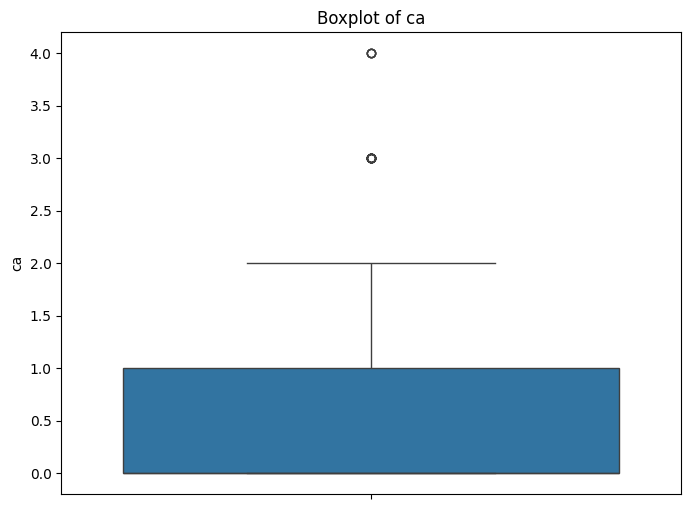

In [354]:

plt.figure(figsize=(8, 6))
sns.boxplot(df['ca'])
plt.title('Boxplot of ca')
plt.show()


# Example of replacing outliers (if necessary)
df.loc[df['ca'] >=3, 'ca'] = df['ca'].median()



<Axes: xlabel='thal', ylabel='Count'>

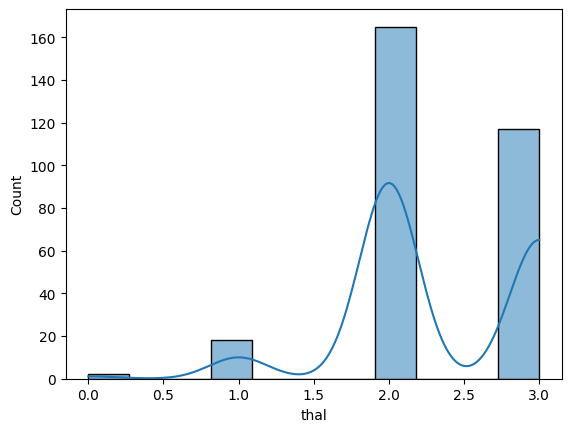

In [355]:
df['thal'].unique()

#distribution using histogram
sns.histplot(df['thal'],kde=True)

<Axes: ylabel='thal'>

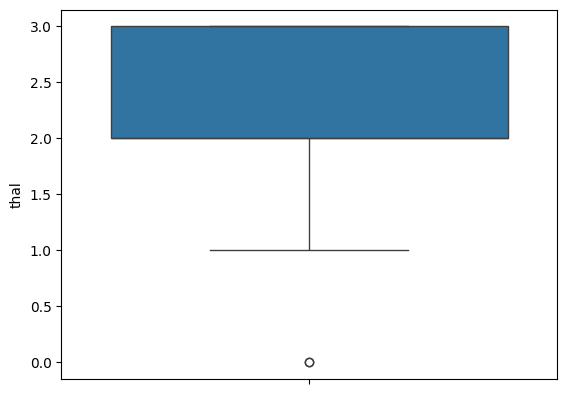

In [356]:
#boxplot for thal
sns.boxplot(df['thal'])

In [357]:
#remove outliers from thal when its less than 1
df.loc[df['thal'] < 1, 'thal'] = df['thal'].median()


<Axes: ylabel='thal'>

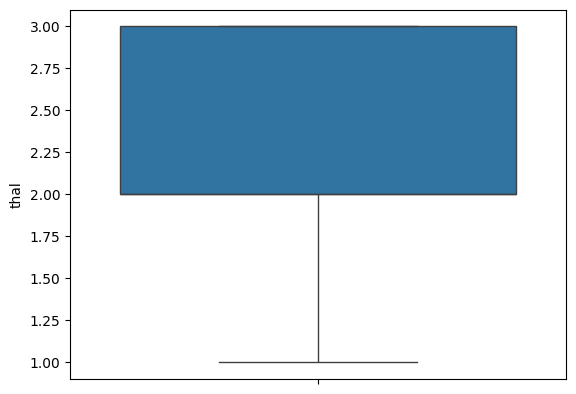

In [358]:
#boxplot for thal
sns.boxplot(df['thal'])

<Axes: >

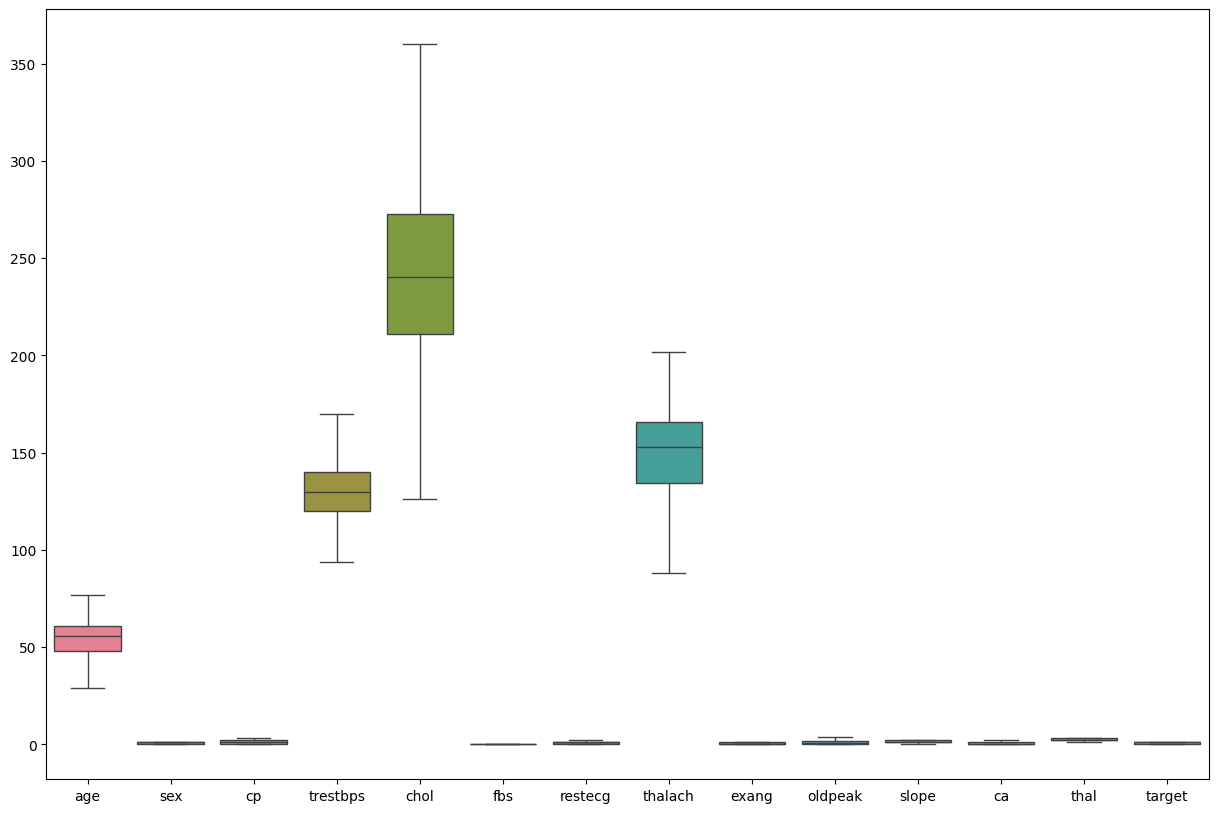

In [359]:
#lets check for outliers usinf boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.4 KB


<Axes: >

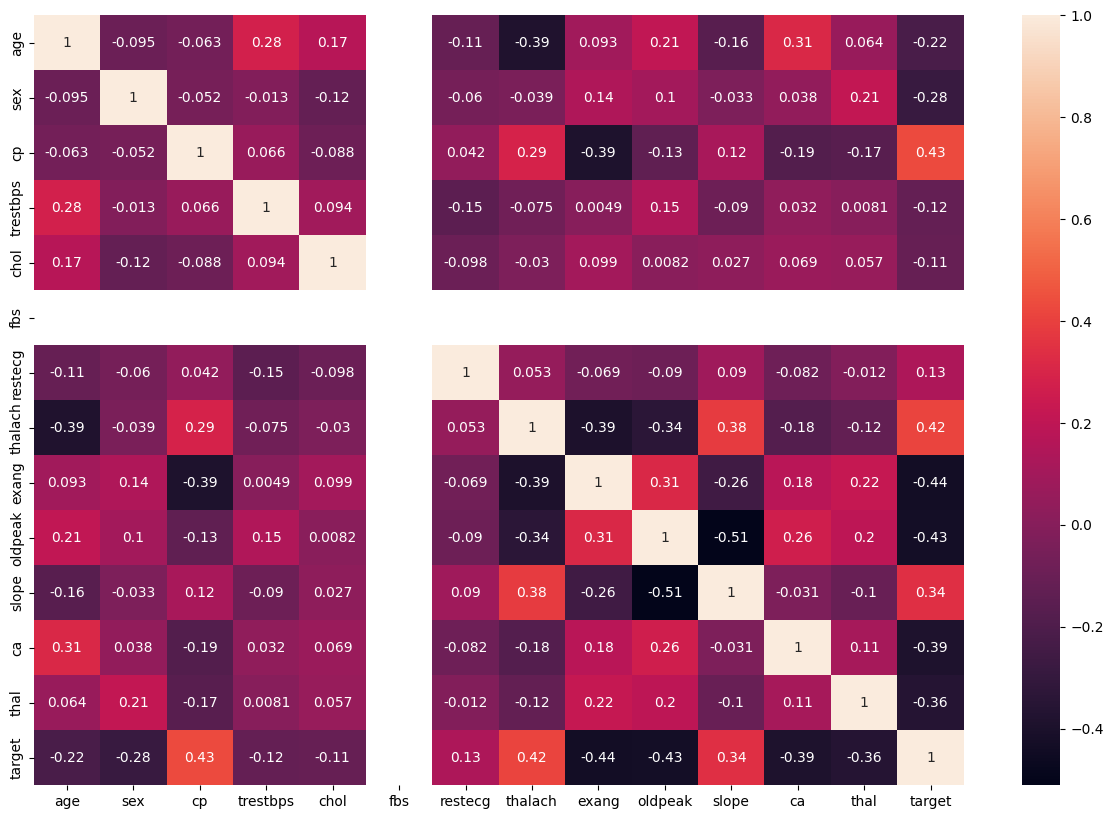

In [361]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)

In [362]:

# Import necessary libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (241, 13)
X_test shape: (61, 13)
y_train shape: (241,)
y_test shape: (61,)


In [363]:


# Import necessary libraries for building the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs= 10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4577 - loss: 23.9293 - val_accuracy: 0.4286 - val_loss: 12.2589
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4815 - loss: 6.9429 - val_accuracy: 0.5102 - val_loss: 4.2425
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5079 - loss: 6.6418 - val_accuracy: 0.5306 - val_loss: 4.6473
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5238 - loss: 4.5853 - val_accuracy: 0.3469 - val_loss: 3.3108
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4051 - loss: 2.9568 - val_accuracy: 0.3878 - val_loss: 2.9311
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3559 - loss: 2.3604 - val_accuracy: 0.4694 - val_loss: 1.5410
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3851 - loss: 1.6546 - val_accuracy: 0.3878 - val_loss: 1.2740
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4795 - loss: 1.0605 - val_accuracy: 0.5918 - val_loss: 0.7643
Epoch 9/10
6/6 ━

In [365]:

# Evaluate the model on the test set and obtain predictions
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7736 - loss: 0.5906 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Loss: 0.5915887355804443
Test Accuracy: 0.7540983557701111
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.71      0.91      0.79        32

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.74        61
weighted avg       0.78      0.75      0.75        61

Confusion Matrix:
 [[17 12]
 [ 3 29]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


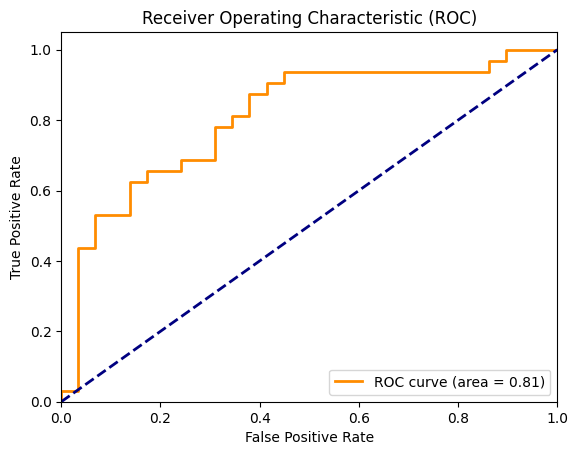

In [366]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#conclusion

The project successfully demonstrated the ability to use a neural network to predict heart disease.  The model achieved good accuracy and provides valuable insights for identifying patients at risk. Continued improvement could focus on refining the model and incorporating more advanced techniques to further increase its accuracy and reliability.

